<a href="https://colab.research.google.com/github/GauravKakoti/Data-Science/blob/main/DiabetesPrediction(ArtificialNeuralNetwork).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program detects if a person has diabetes or not

In [ ]:
#Load Libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the Data
from google.colab import files
uploaded = files.upload()

Saving datasets_228_482_diabetes.csv to datasets_228_482_diabetes.csv


In [ ]:
#Store the data set
df = pd.read_csv('datasets_228_482_diabetes.csv')

#Print the first 7 rows odf data
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [ ]:
#Show the shape (No. of rows and columns)
df.shape

(768, 9)

In [ ]:
#Check for duplicacies and remove them
df.drop_duplicates(inplace= True)

In [ ]:
#Show the shape (No. of rows and columns)
df.shape

(768, 9)

In [ ]:
#show the no. of missing data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Convert the data into array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
#Get all of the rows from the first eight columns of the dataset
X = dataset[:, 0:8]
Y = dataset[:, 8]


In [ ]:
#Process the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
#Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scale,Y, test_size =0.2, random_state = 4)

In [ ]:
#Build the Model

model = Sequential([
             Dense(12, activation='relu', input_shape=(8,)),
             Dense(15, activation='relu'),
             Dense(1, activation='sigmoid')       
])

In [ ]:
#Compile the Model
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

In [ ]:
#Train the Model
hist = model.fit(X_train, Y_train, batch_size = 57, epochs=1000, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 620us/step - loss: 0.6836 - accuracy: 0.6477 - val_loss: 0.6760 - val_accuracy: 0.6504
Epoch 2/1000
491/491 [==============================] - 0s 39us/step - loss: 0.6826 - accuracy: 0.6477 - val_loss: 0.6753 - val_accuracy: 0.6504
Epoch 3/1000
491/491 [==============================] - 0s 38us/step - loss: 0.6818 - accuracy: 0.6477 - val_loss: 0.6747 - val_accuracy: 0.6504
Epoch 4/1000
491/491 [==============================] - 0s 33us/step - loss: 0.6811 - accuracy: 0.6477 - val_loss: 0.6741 - val_accuracy: 0.6504
Epoch 5/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6802 - accuracy: 0.6477 - val_loss: 0.6735 - val_accuracy: 0.6504
Epoch 6/1000
491/491 [==============================] - 0s 33us/step - loss: 0.6796 - accuracy: 0.6477 - val_loss: 0.6730 - val_accuracy: 0.6504
Epoch 7/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6789

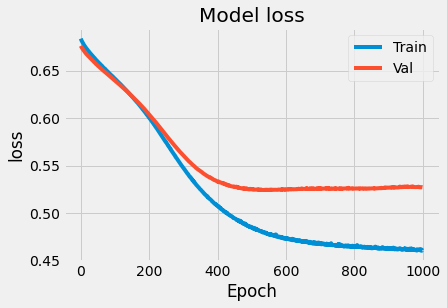

In [ ]:
#Visualize the training loss and validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

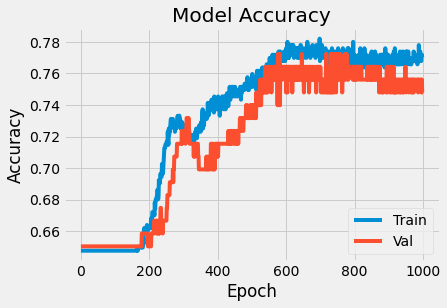

In [ ]:
#Visualize the training accuracy and validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [ ]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction = [1 if Y>= 0.5 else 0 for Y in prediction]
print(prediction)
print(Y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [ ]:
#Evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if Y>= 0.5 else 0 for Y in pred]
print(classification_report(Y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(Y_train, pred))
print()
print('Accuracy: ', accuracy_score(Y_train, pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       398
         1.0       0.71      0.57      0.63       216

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614

Confusion Matrix: 
 [[347  51]
 [ 92 124]]

Accuracy:  0.7671009771986971


In [ ]:
#Evaluate the model on the test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_test)
pred = [1 if Y>= 0.5 else 0 for Y in pred]
print(classification_report(Y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(Y_test, pred))
print()
print('Accuracy: ', accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       102
         1.0       0.71      0.67      0.69        52

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154

Confusion Matrix: 
 [[88 14]
 [17 35]]

Accuracy:  0.7987012987012987
